<a href="https://colab.research.google.com/github/DiegoMacielDM/An-liseVendasDio/blob/main/An%C3%A1liseVendasDio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importando as bibliotecas**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use("seaborn")

### **upload dos arquivos**

In [2]:
from google.colab import files
arq = files.upload()

Saving AdventureWorks.xlsx to AdventureWorks.xlsx


### **Verificando se temos valores nulos ou ausentes**

In [26]:
df.isnull().sum()

Data Venda        0
Data Envio        0
ID Loja           0
ID Produto        0
ID Cliente        0
No. Venda         0
Custo Unitário    0
Preço Unitário    0
Quantidade        0
Valor Desconto    0
Valor Venda       0
Produto           0
Fabricante        0
Marca             0
Classe            0
Cor               0
Custo             0
Lucro             0
Tempo_envio       0
dtype: int64

### **Abrindo o arquivo**

In [3]:
df = pd.read_excel("AdventureWorks.xlsx")
df.head(5)

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
1,2008-05-12,2008-05-17,306,384,19051,200805123CS567,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
2,2008-05-14,2008-05-20,306,384,19052,200805143CS576,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
3,2008-05-21,2008-05-27,306,384,19052,200805213CS576,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
4,2008-06-20,2008-06-27,306,384,19053,200806203CS586,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red


### **Analisando a quantidade de linhas e colunas**

In [5]:
df.shape

(904, 16)

### **Verificando os tipos de dados**

In [6]:
df.dtypes

Data Venda        datetime64[ns]
Data Envio        datetime64[ns]
ID Loja                    int64
ID Produto                 int64
ID Cliente                 int64
No. Venda                 object
Custo Unitário           float64
Preço Unitário           float64
Quantidade                 int64
Valor Desconto           float64
Valor Venda              float64
Produto                   object
Fabricante                object
Marca                     object
Classe                    object
Cor                       object
dtype: object

### **Qual foi a receita total?**

In [9]:
df["Valor Venda"].sum()

5984606.1426

### **Qual custo total?**

In [11]:
df["Custo"] = df["Custo Unitário"].mul(df["Quantidade"]) #criando a coluna Custo
df.head(5)

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,Custo
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48
1,2008-05-12,2008-05-17,306,384,19051,200805123CS567,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48
2,2008-05-14,2008-05-20,306,384,19052,200805143CS576,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48
3,2008-05-21,2008-05-27,306,384,19052,200805213CS576,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48
4,2008-06-20,2008-06-27,306,384,19053,200806203CS586,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48


In [13]:
#Custo Total
round(df["Custo"].sum(), 2)

2486783.05

### **Agora que temos a receita,o Custo e o total, podemos sabero valor do Lucro total**
### Vamos criar uma coluna de Lucro que será receita - custo

In [17]:
df["Lucro"] = df["Valor Venda"] - df["Custo"]
df.head(5)

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,Custo,Lucro
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48,2456.52
1,2008-05-12,2008-05-17,306,384,19051,200805123CS567,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48,2456.52
2,2008-05-14,2008-05-20,306,384,19052,200805143CS576,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48,2456.52
3,2008-05-21,2008-05-27,306,384,19052,200805213CS576,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48,2456.52
4,2008-06-20,2008-06-27,306,384,19053,200806203CS586,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48,2456.52


In [18]:
#Lucro total
round(df["Lucro"].sum(), 2)

3497823.09

### **Criando uma coluna com o total de dias para enviar o produto**

In [19]:
df["Tempo_envio"] = df["Data Envio"] - df["Data Venda"]
df.head(5)

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,Custo,Lucro,Tempo_envio
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48,2456.52,20 days
1,2008-05-12,2008-05-17,306,384,19051,200805123CS567,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48,2456.52,5 days
2,2008-05-14,2008-05-20,306,384,19052,200805143CS576,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48,2456.52,6 days
3,2008-05-21,2008-05-27,306,384,19052,200805213CS576,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48,2456.52,6 days
4,2008-06-20,2008-06-27,306,384,19053,200806203CS586,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48,2456.52,7 days


In [20]:
#Estraindo apenas os dias
df["Tempo_envio"] = (df["Data Envio"] - df["Data Venda"]).dt.days
df.head()

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,Custo,Lucro,Tempo_envio
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48,2456.52,20
1,2008-05-12,2008-05-17,306,384,19051,200805123CS567,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48,2456.52,5
2,2008-05-14,2008-05-20,306,384,19052,200805143CS576,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48,2456.52,6
3,2008-05-21,2008-05-27,306,384,19052,200805213CS576,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48,2456.52,6
4,2008-06-20,2008-06-27,306,384,19053,200806203CS586,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48,2456.52,7


In [21]:
df["Tempo_envio"].dtypes

dtype('int64')

### **Média do tempo de envio por marcas**

In [24]:
df.groupby("Marca")["Tempo_envio"].mean()

Marca
Adventure Works    8.663866
Contoso            8.470930
Fabrikam           8.510121
Name: Tempo_envio, dtype: float64

### **Sabendo o lucro por ano e marca**

In [74]:
df.groupby([df["Data Venda"].dt.year , "Marca"])["Lucro"].sum()

Data Venda  Marca          
2008        Adventure Works     306,641.16
            Contoso              56,416.00
            Fabrikam          1,557,020.55
2009        Adventure Works     405,395.08
            Contoso             138,258.95
            Fabrikam          1,034,091.35
Name: Lucro, dtype: float64

In [73]:
#melhorando o modo de mostrar os valores

pd.options.display.float_format = '{:,.2f}'.format


In [75]:
#Resetando o Index
Lucro_ano = df.groupby([df["Data Venda"].dt.year, "Marca"])["Lucro"].sum().reset_index()
Lucro_ano

,Data Venda,Marca,Lucro
0,2008,Adventure Works,"306,641.16"
1,2008,Contoso,"56,416.00"
2,2008,Fabrikam,"1,557,020.55"
3,2009,Adventure Works,"405,395.08"
4,2009,Contoso,"138,258.95"
5,2009,Fabrikam,"1,034,091.35"


### **Qual total de produtos vendidos?**

In [76]:
df.groupby("Produto")["Quantidade"].sum().sort_values(ascending=False)

Produto
Headphone Adapter for Contoso Phone E130 Silver    25232
Headphone Adapter for Contoso Phone E130 White     25008
Adventure Works Laptop15.4W M1548 Black             1089
Fabrikam Trendsetter 2/3'' 17mm X100 Grey           1087
Adventure Works Laptop15.4W M1548 Red               1047
Fabrikam Trendsetter 2/3'' 17mm X100 Black           926
Fabrikam Trendsetter 1/3'' 8.5mm X200 Black          884
Fabrikam Trendsetter 1/3'' 8.5mm X200 Grey           845
Fabrikam Trendsetter 1/3'' 8.5mm X200 White          789
Name: Quantidade, dtype: int64

### **Gráficos total de produtos vendidos**

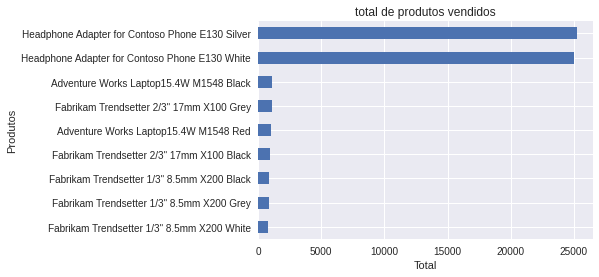

In [77]:
#Total de lucro
df.groupby("Produto")["Quantidade"].sum().sort_values(ascending=True).plot.barh(title="total de produtos vendidos")
plt.xlabel("Total")
plt.ylabel("Produtos");

In [78]:
#Lucro por ano
df.groupby(df["Data Venda"].dt.year)["Lucro"].sum()


Data Venda
2008   1,920,077.71
2009   1,577,745.38
Name: Lucro, dtype: float64

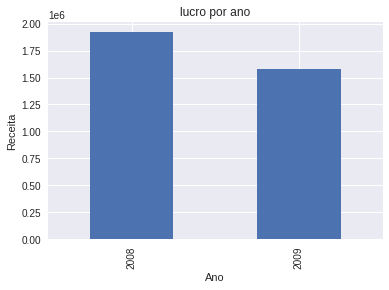

In [79]:
df.groupby(df["Data Venda"].dt.year)["Lucro"].sum().plot.bar(title="lucro por ano")
plt.xlabel("Ano")
plt.ylabel("Receita");

### **Análisando as vendas do ano de 2009**

In [80]:
#selecionando apenas as vendas de 2009
df_2009 = df[df["Data Venda"].dt.year == 2009]
df_2009.head(5)

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,Custo,Lucro,Tempo_envio
11,2009-05-02,2009-05-14,199,384,18938,200905023CS847,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",12
12,2009-05-16,2009-05-27,306,384,19067,200905163CS746,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",11
13,2009-05-31,2009-06-12,306,384,19068,200905313CS748,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",12
14,2009-06-28,2009-07-11,199,384,18959,200906283CS870,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",13
15,2009-07-08,2009-07-12,306,384,19070,200907083CS757,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",4


In [81]:
#Lucro por mês no ano de 2009
df_2009.groupby(df_2009["Data Venda"].dt.month)["Lucro"].sum()

Data Venda
1    130,719.04
2    179,228.92
3    147,538.25
4     66,354.39
5     90,540.00
6    200,310.41
7    227,134.51
8     46,756.42
9     83,952.62
10   130,678.05
11   132,202.23
12   142,330.53
Name: Lucro, dtype: float64

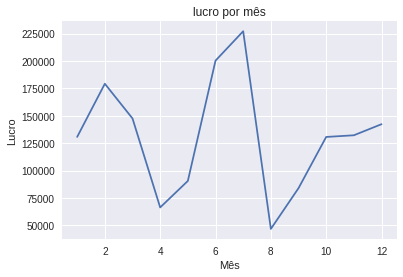

In [82]:
#Lucro por mês no ano de 2009 em gráfico
df_2009.groupby(df_2009["Data Venda"].dt.month)["Lucro"].sum().plot(title="lucro por mês")
plt.xlabel("Mês")
plt.ylabel("Lucro");

In [83]:
#Lucro por marca X Lucro no ano 2009
df_2009.groupby("Marca")["Lucro"].sum()

Marca
Adventure Works     405,395.08
Contoso             138,258.95
Fabrikam          1,034,091.35
Name: Lucro, dtype: float64

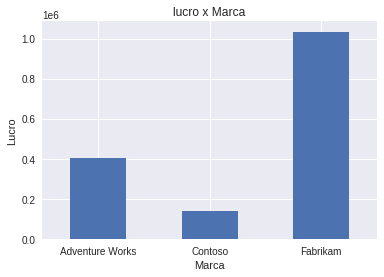

In [84]:
#Lucro por marca X Lucro no ano 2009 grafico
df_2009.groupby("Marca")["Lucro"].sum().plot.bar(title="lucro x Marca")
plt.xlabel("Marca")
plt.ylabel("Lucro")
plt.xticks(rotation='horizontal');

In [85]:
#Lucro por Classe X Lucro no ano 2009 
df_2009.groupby("Classe")["Lucro"].sum()

Classe
Economy     138,258.95
Regular   1,439,486.43
Name: Lucro, dtype: float64

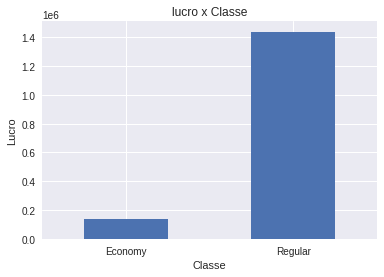

In [86]:
#Lucro por Classe X Lucro no ano 2009 grafico
df_2009.groupby("Classe")["Lucro"].sum().plot.bar(title="lucro x Classe")
plt.xlabel("Classe")
plt.ylabel("Lucro")
plt.xticks(rotation='horizontal');

In [87]:
#Fazendo uma análise mais detalhada no tempo de envio
df["Tempo_envio"].describe()

count   904.00
mean      8.54
std       3.06
min       4.00
25%       6.00
50%       9.00
75%      11.00
max      20.00
Name: Tempo_envio, dtype: float64

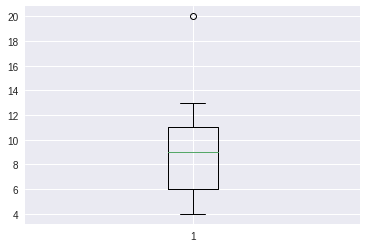

In [89]:
#Gráfico Boxplot
plt.boxplot(df["Tempo_envio"]);

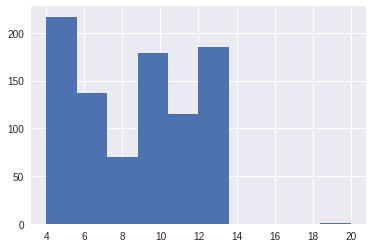

In [90]:
#Gráfico Histograma
plt.hist(df["Tempo_envio"]);

In [91]:
#tempo minimo de envio
df["Tempo_envio"].min()

4

In [92]:
#tempo maximo de envio
df["Tempo_envio"].max()

20

In [94]:
#Produto que levou 20 dias para ser entregue
df[df["Tempo_envio"] == 20]

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,Custo,Lucro,Tempo_envio
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",20


In [96]:
#salvando a análise em arquivo
df.to_csv("df_vendas_novo", index=False)